<a href="https://colab.research.google.com/github/Sandeep-ML-DL-NLP/Machine_Learning_Models/blob/main/dnn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()

<Figure size 72x72 with 0 Axes>

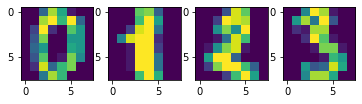

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (1,1))
fig,ax = plt.subplots(1,4)
ax[0].imshow(digits.images[0])
ax[1].imshow(digits.images[1])
ax[2].imshow(digits.images[2])
ax[3].imshow(digits.images[3])

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
n_samples = len(digits.images)
n_samples
data = digits.images.reshape(n_samples,-1)
data.shape

(1797, 64)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,digits.target,test_size = 0.05,shuffle = False)

In [ ]:
# Estimator Input Function
# create column names for our model input function
columns = ['p_'+ str(i) for i in range(1,65)]
feature_column = []
for col in columns:
  feature_column.append(tf.feature_column.numeric_column(key = col))
def input_fn(features,labels,training = True,batch_size = 32):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
  if training:
    dataset = dataset.shuffle(1000).repeat()
  return dataset.batch(batch_size)

In [ ]:
classifier = tf.estimator.DNNClassifier(hidden_units = [256, 128, 64],
                                        feature_columns = feature_column,
                                        optimizer = 'Adagrad',
                                        n_classes = 10,
                                        model_dir = 'classifier')

In [ ]:
# create dataframes for training
import pandas as pd
dftrain = pd.DataFrame(x_train, columns = columns) 

In [ ]:
classifier.train(input_fn = lambda:input_fn(dftrain, 
                                            y_train, 
                                            training = True),
                                            steps = 2000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
dftest = pd.DataFrame(x_test, columns = columns)

In [ ]:
eval_result = classifier.evaluate(
    input_fn = lambda:input_fn(dftest, y_test, training = False)
)

In [ ]:
eval_result

{'accuracy': 0.9444444,
 'average_loss': 0.15425079,
 'loss': 0.15070999,
 'global_step': 2000}

In [ ]:
# An input function for prediction
def pred_input_fn(features, batch_size = 32):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
     
test = dftest.iloc[:2,:] #1st two data points for predictions 
expected = y_test[:2].tolist() #expected labels
pred = list(classifier.predict(
    input_fn =  lambda:pred_input_fn(test))
)

In [ ]:
for pred_dict, expec in zip(pred, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    print('predicted class {} , probability of prediction {} , expected label {}'.format(class_id,probability,expec))

predicted class 8 , probability of prediction 0.9581747055053711 , expected label 8
predicted class 4 , probability of prediction 0.9770480394363403 , expected label 4
